# Problem Statement:
 - Given the Years of experience we have to predict salary of the person. Since dependent variable salary is continuous, it is a regression problem.
 - We will use three methods i.e. Gradient descent (Optimization method), Statistical method (formula) and Scikit learn Linear regression library to estimate the regression parameter.
 - After that we will compare the parameters learned from all these three algorithm.

# Importing libraries and Loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("salary_data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


#### independent variable (X):
YearsExperience

#### dependent variable (y):
Salary

In [4]:
X = df["YearsExperience"]
y = df["Salary"]

Text(0, 0.5, 'Salary')

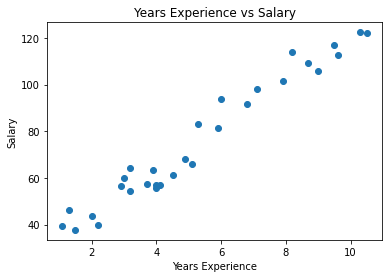

In [5]:
plt.scatter(X,y)
plt.title("Years Experience vs Salary")
plt.xlabel("Years Experience")
plt.ylabel("Salary")

 - The graph shows there is a linear positive relationship between Years of experience and salary, which means as Experience increases salary also increases linearly.

#### Normalize the data set to make learning faster

In [6]:
X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

- Min-Max normalization is scaling technique, for every feature it will bring value between 0 and 1. 
- Minimum value will get transformed to 0.
- Maximum Value will get transformed to 1.
- Rest of the value will be between 0 and 1.

#### Reason: why scaling?
- The one of the important reason we apply scaling so that optimization algorithm such as gradient descent will converge faster   (will reach to minima faster).
#### Problem with scaling
-  Problem with scaling is it makes parameters hard to interpret.

Text(0, 0.5, 'Salary')

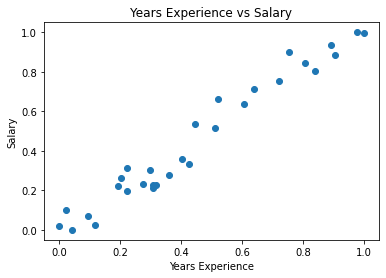

In [7]:
plt.scatter(X,y)
plt.title("Years Experience vs Salary")
plt.xlabel("Years Experience")
plt.ylabel("Salary")

 - Scatter plot shows, if we draw a straight line from Years of experience we can predict the salary of the person.
 - The equation of straight line is given by: 
                                         
                                         Y = mX + c
 
 - We know the value of `X` i.e. years of experience and we also know the value of Y i.e. salary. We don't know `m` i.e. slope of the line and `c` i.e. y intercept.
 
 - If we would have known `m` and `c` with respect to X (years of experience) and Y (salary) we would have drawn the best fitted straight line.


#### What ML algorithm learns.

-  In Machine learning terms `m` and `c` are called as the `parameters`, and that is what the machine learns. 

 
#### How machine learns?
- Equation  of straight line:

  $ y_{predict} = \theta_0 + \theta_1 * X $
                                    
 c = $\theta_0$,  m = $\theta_1$


1. Randomly select $\theta_0$ and $\theta_1$.
2. Calculate the y_predict:
                         
 $ y_{predict} = \theta_0 + \theta_1 * X $
                        
                        
3. Calculate the cost:
   
       What is cost?
       As mentioned earlier, gradient descent is an optimization algorithm. In machine learning the job of optimization 
       algorithms is to find the parameters such that the error is low. For regression the error function 
       is called Mean Square Error. The cost function of regression is nothing but Mean Square Error.
       
       In short, We have to find parameters such that cost (Mean Square Error) is low.

 cost  = $\frac{1}{n}\sum_{t=1}^{n} (Y - y_{predict})^2$


4. Update parameter, $\theta_0$ and $\theta_1$.


5. Repeat procedure 2 to 4 until cost becomes 0 or difference between cost at previous iteration and current iteration very small.

In [8]:
def initialize():
    theta0 = np.random.randn() #initialize theta0
    theta1 = np.random.randn() #initialize theta1

    cost_itr = [] #track of cost at every iteration
    itr = [] #iteration
    return theta0, theta1, cost_itr, itr

- initialize:
 
 parameter $\theta_0$ , $\theta_1$  randomly
 
   itr → list of iteration, for how long our algorithm will be running
 
   cost_itr → list of costs, which will store cost at every iteration

In [9]:
def predict(theta0, theta1, X):
    y_hat = theta0 + theta1 * X
    return y_hat

- predict:

$ 𝑦_{𝑝𝑟𝑒𝑑𝑖𝑐𝑡}=𝜃_0+𝜃_1∗𝑋$ 

In [10]:
def plotting(X,y,y_hat,title1,cost_itr, itr,title2):
    plt.figure(figsize =(13, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X,y, color='m', lw=2)
    plt.plot(X,y_hat)
    plt.legend(["Predicted", "Actual"])
    plt.title(title1)
    plt.subplot(1, 2, 2)
    plt.plot(cost_itr,itr)
    plt.title(title2)
    plt.show()

- Plot:
        It will plot the y_predict line and cost at given iteration, It is not required but it is important to understand the concepts.

In [34]:
def learn(X,y,n,alpha):
    theta0, theta1, cost_itr, itr = initialize() #initialize the learning rate, theta0 and theta1, cost_itr and itr are list
    
    for i in range(n):
        
        y_hat = predict(theta0, theta1, X)
        temp0 = theta0 - alpha * np.mean(y_hat-y) #Derivative of cost function with respect to 𝜃0
        temp1= theta1 - alpha * np.mean((y_hat-y) * X) #Derivative of cost function with respect to 𝜃1
        theta0 = temp0
        theta1 = temp1
    
        cost = np.mean((y_hat - y)**2)
    
        itr.append(i)
        cost_itr.append(cost)
        
        if i%300==0:
            title1 = "Actual vs Predicted after " + str(i) + " iteration" 
            title2 = "Cost at iteration " + str(i)  
            plotting(X,y,y_hat,title1,cost_itr, itr, title2)
        
    return theta0, theta1, cost_itr, itr

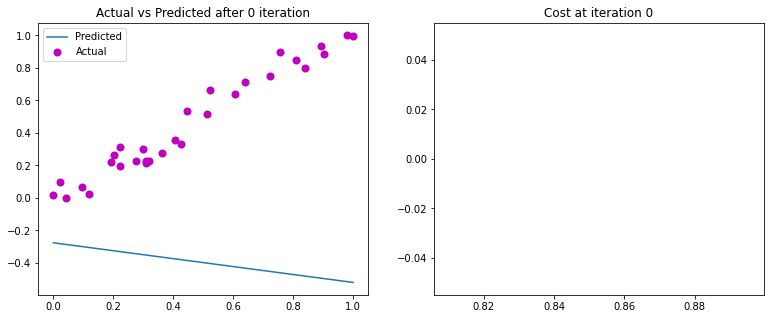

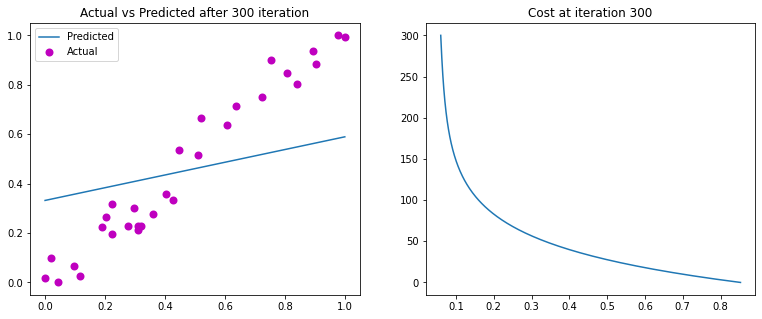

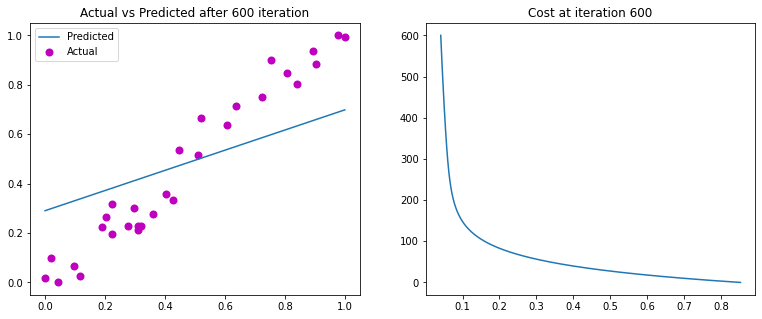

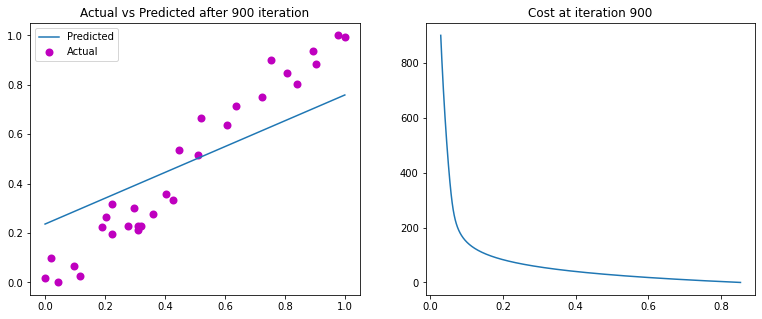

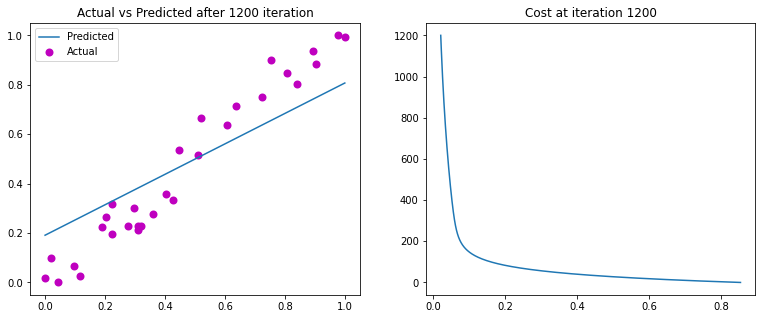

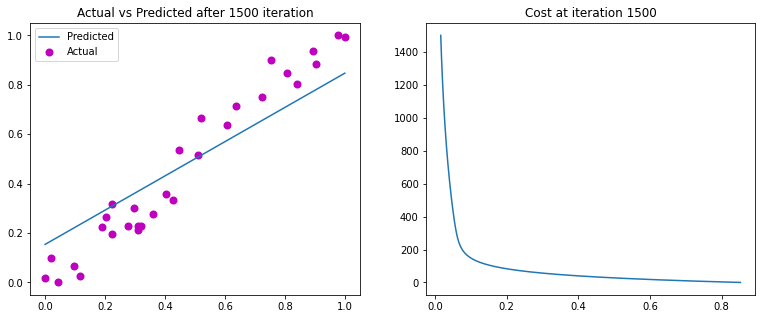

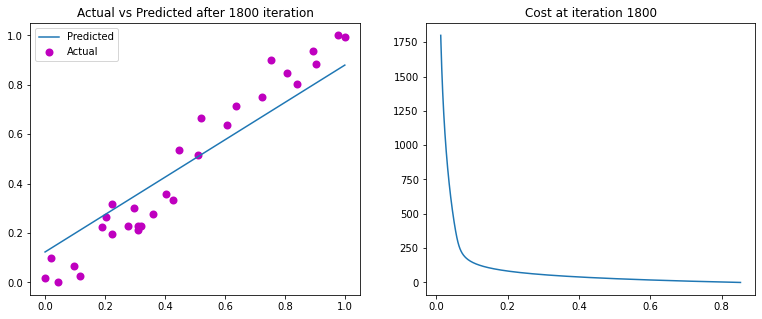

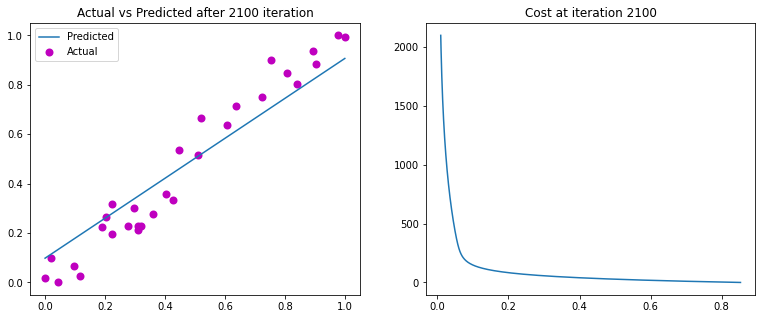

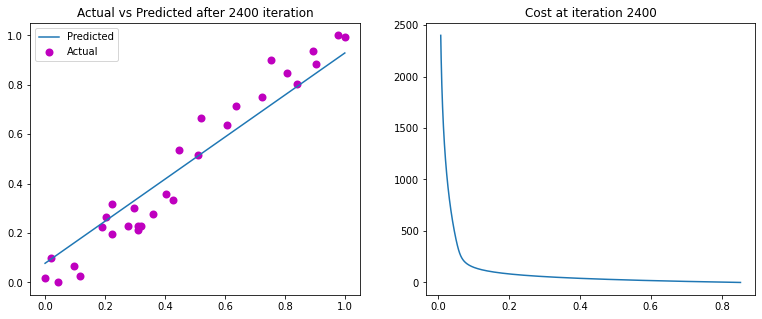

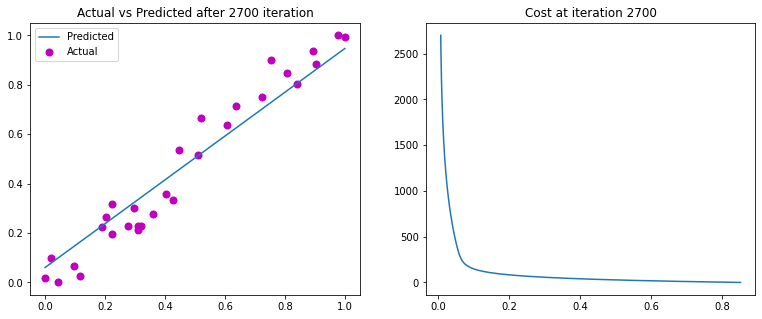

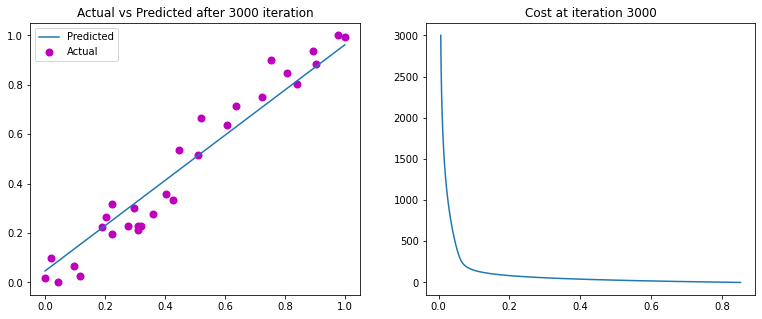

In [61]:
theta0, theta1, cost_itr, itr = learn(X,y,n=3001, alpha = 0.009) 

$\theta_0$ and $\theta_1$ are learned parameter after 3000 iteration. Let's use them to predict y.

In [62]:
y_hat = theta0 + theta1 * X

# Statistical Approach
Other than Gradient descent approach there is statistical approach to find the parameter (m,c) of regression line. The statistical approach is direct or formula based approach to find parameters.

$ y_{predict} = \beta_0 + \beta_1 * X $
                                    
 c = $\beta_0$,  m = $\beta_1$

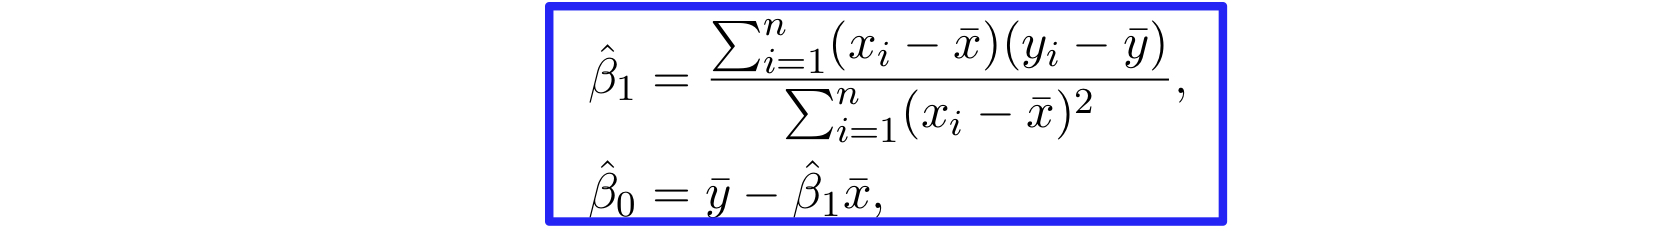

In [63]:
x_mean = np.mean(X)
y_mean = np.mean(y)

beta1 = np.sum((X - x_mean) * (y - np.mean(y))) / np.sum((X-np.mean(X))**2)
beta0 = np.mean(y) - beta1 * np.mean(X)

In [64]:
y_pred = beta0 + beta1 * X

Text(0.5, 1.0, 'Statistical approach to estimate regression parameter')

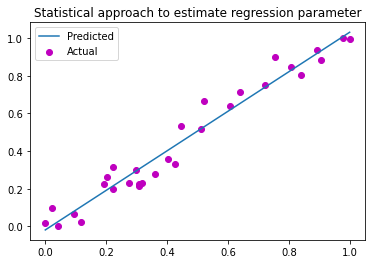

In [65]:
plt.scatter(X,y, color='m')
plt.plot(X,y_pred)
plt.legend(["Predicted", "Actual"])
plt.title("Statistical approach to estimate regression parameter")

Text(0.5, 1.0, 'Actual vs Predicted statistical vs Predicted Gradient Descent')

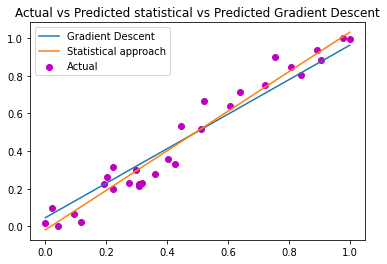

In [66]:
plt.scatter(X,y, color='m') ## atual Y
plt.plot(X,y_hat) ## Gradient Descent Approach
plt.plot(X,y_pred) ## Statistical Approach
plt.legend(["Gradient Descent","Statistical approach", "Actual"])
plt.title("Actual vs Predicted statistical vs Predicted Gradient Descent")

In [67]:
print(theta0)
print(theta1)

0.04646509847814418
0.9153570820688134


In [68]:
print(beta0)
print(beta1)

-0.018235781333932555
1.049251663379137


# Scikit learn

In [69]:
arr = np.array(X)
x = arr.reshape(-1,1)
reg = LinearRegression().fit(x, y)
b0 = reg.intercept_
b1 = reg.coef_[0]

In [70]:
print("Coefficient learned by different methods:\n")

print("Gradient Descent")
print("theta0 = ", theta0)
print("theta1 = ", theta1)
print("\n\n")

print("Statistical approach")
print("beta0 = ", beta0)
print("beta1 = ", beta1)
print("\n\n")

print("Scikit learn API")
print("beta0 = ",b0)
print("beta1 = ",b1)


Coefficient learned by different methods:

Gradient Descent
theta0 =  0.04646509847814418
theta1 =  0.9153570820688134



Statistical approach
beta0 =  -0.018235781333932555
beta1 =  1.049251663379137



Scikit learn API
beta0 =  -0.018235781333932444
beta1 =  1.0492516633791367


### Improving Gradient Descent

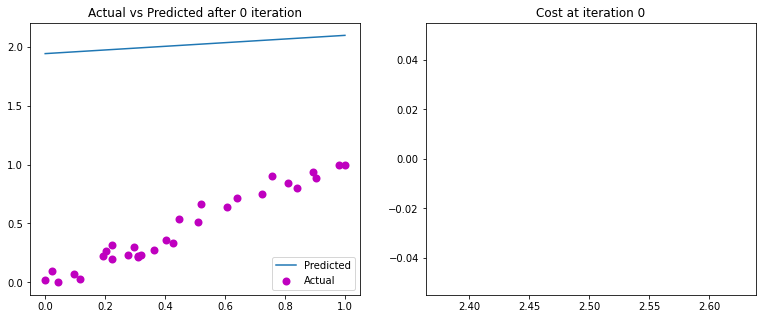

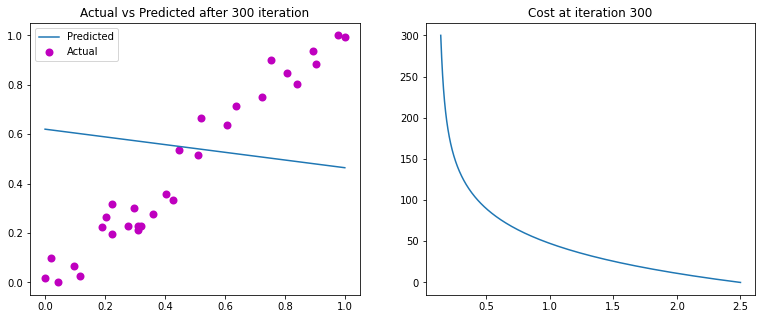

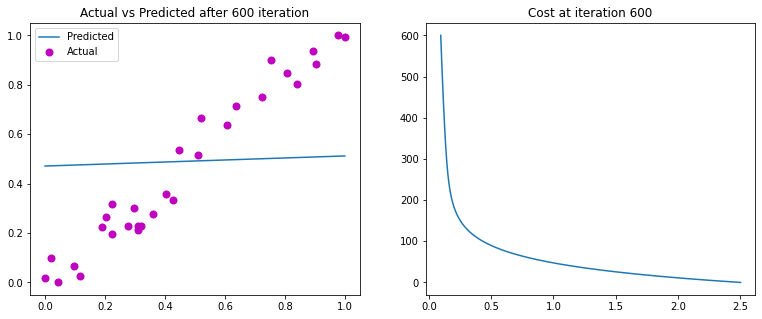

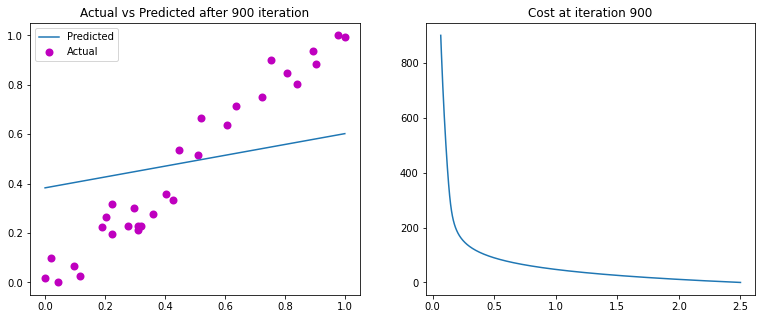

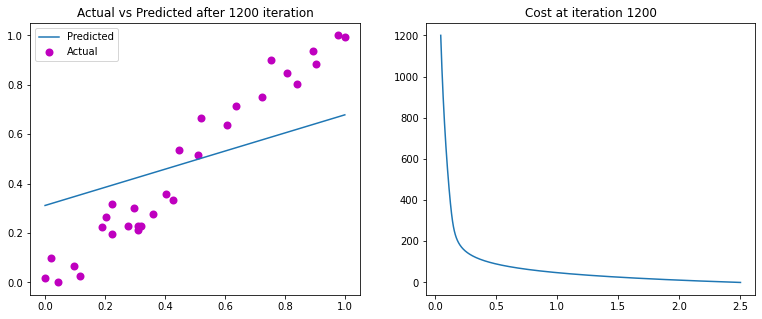

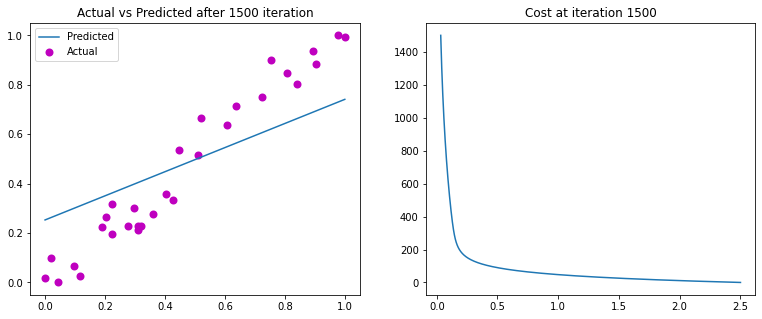

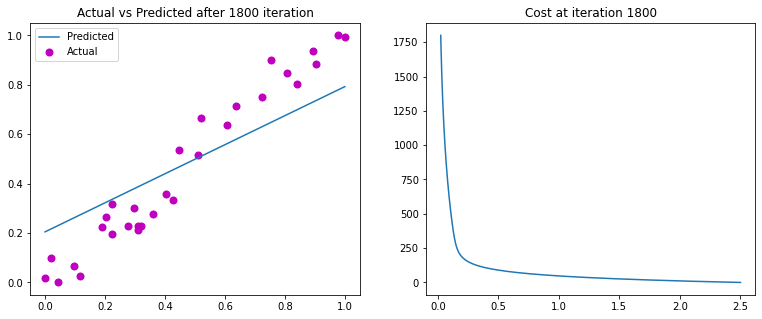

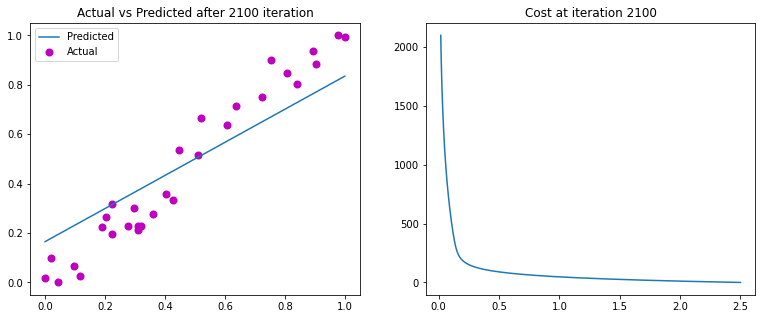

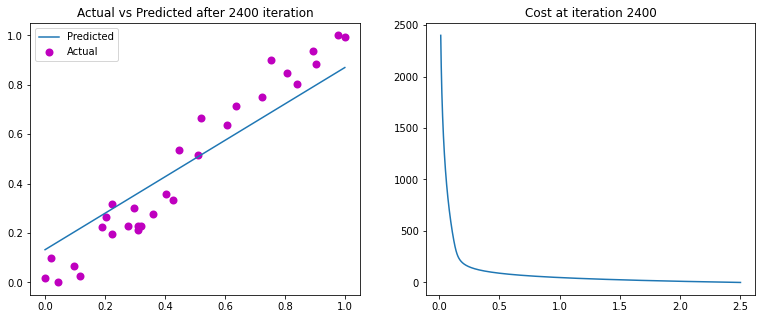

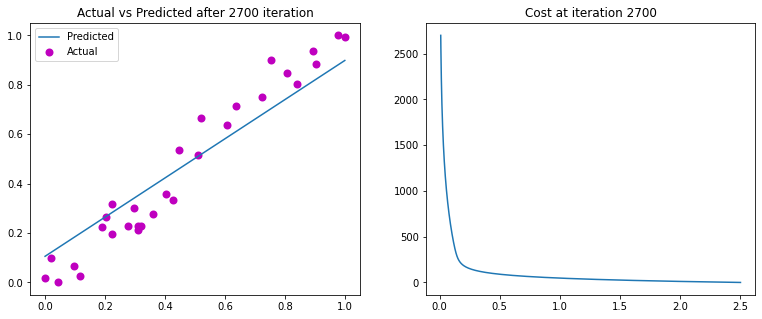

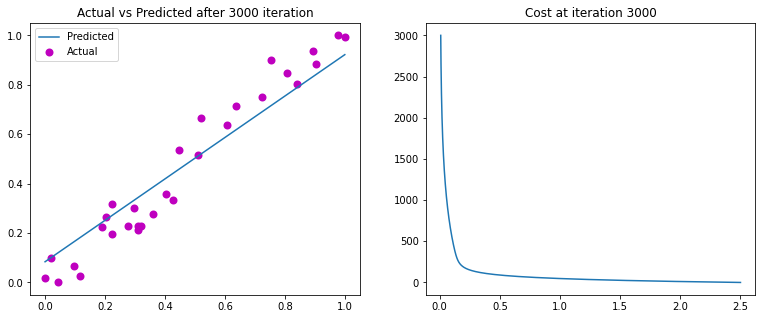

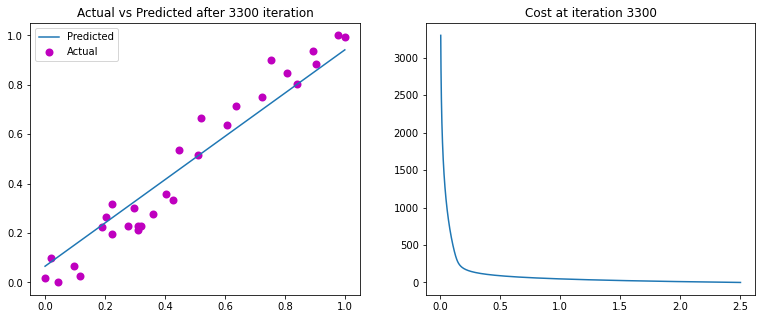

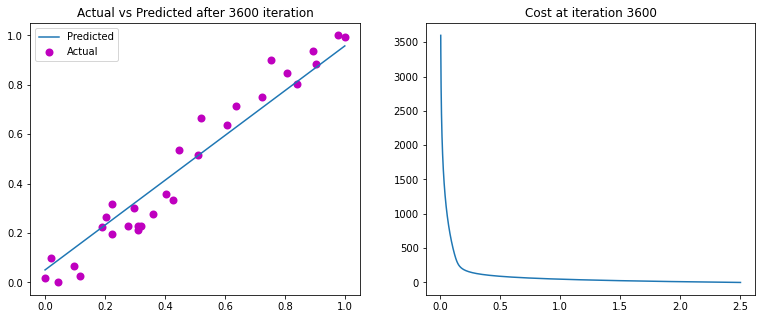

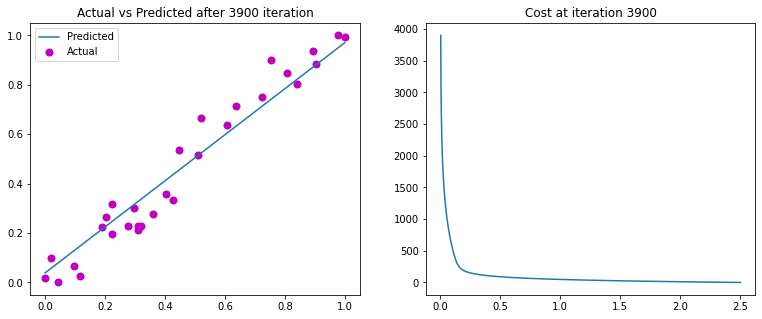

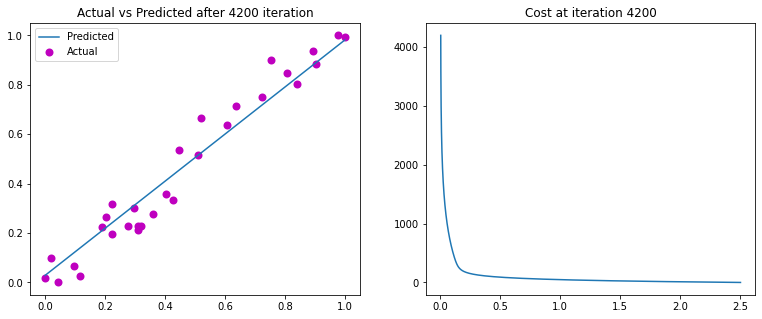

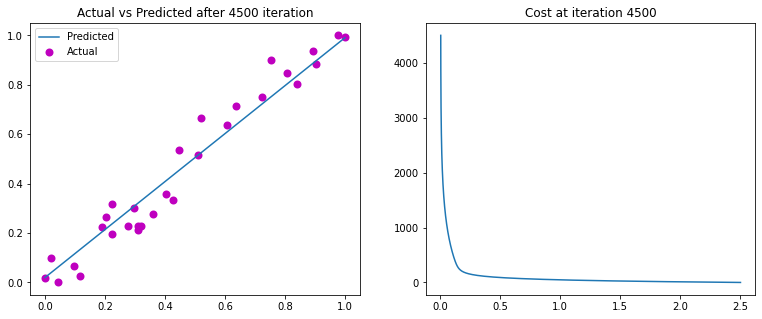

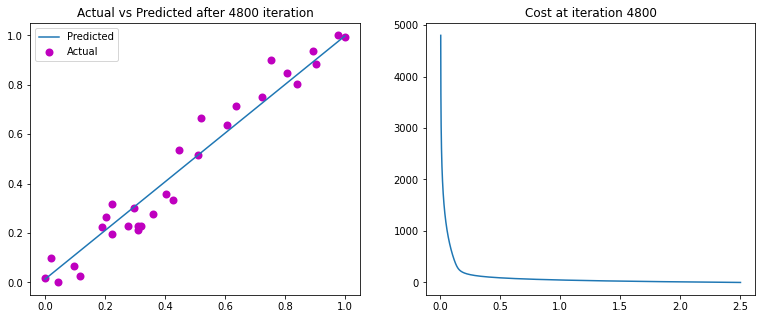

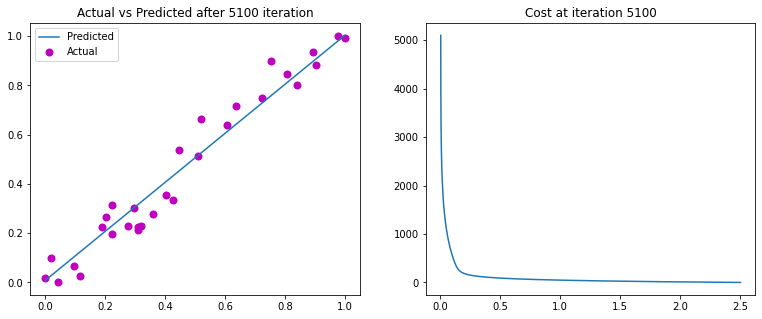

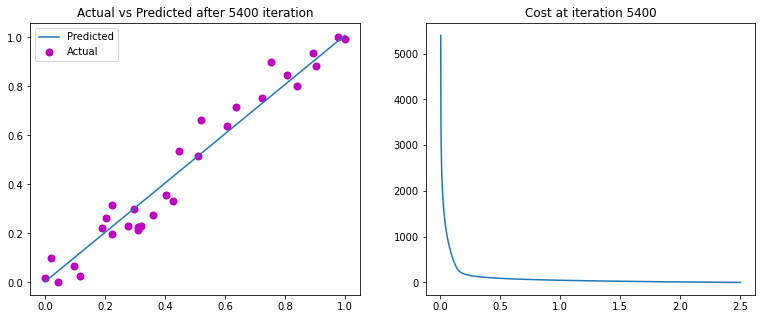

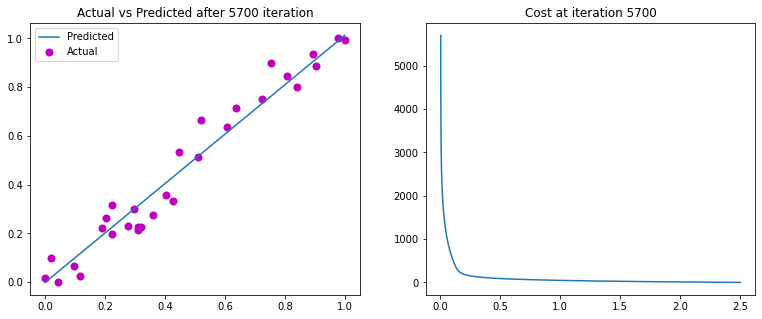

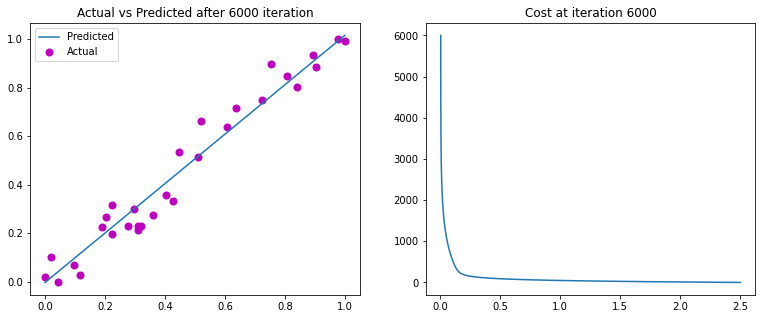

In [45]:
theta0, theta1, cost_itr, itr = learn(X,y,n=6001, alpha = 0.009) 

In [46]:
y_hat = theta0 + theta1 * X

Text(0.5, 1.0, 'Actual vs Predicted statistical vs Predicted Gradient Descent')

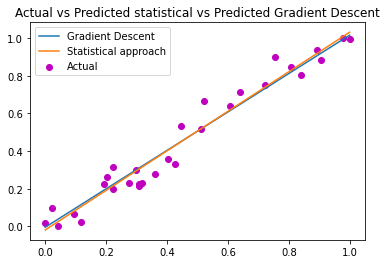

In [47]:
plt.scatter(X,y, color='m') ## atual Y
plt.plot(X,y_hat) ## Gradient Descent Approach
plt.plot(X,y_pred) ## Statistical Approach
plt.legend(["Gradient Descent","Statistical approach", "Actual"])
plt.title("Actual vs Predicted statistical vs Predicted Gradient Descent")

In [49]:
print("Coefficient learned by different methods:\n")

print("Gradient Descent")
print("theta0 = ", theta0)
print("theta1 = ", theta1)
print("\n\n")

print("Statistical approach")
print("beta0 = ", beta0)
print("beta1 = ", beta1)
print("\n\n")

print("Scikit learn API")
print("beta0 = ",b0)
print("beta1 = ",b1)


Coefficient learned by different methods:

Gradient Descent
theta0 =  -0.0038222512798302176
theta1 =  1.0194237293942667



Statistical approach
beta0 =  -0.018235781333932555
beta1 =  1.049251663379137



Scikit learn API
beta0 =  -0.018235781333932444
beta1 =  1.0492516633791367
